In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/TFM /TFM

In [ ]:
%cd /TFM
 

file1 = open('labels_1304.txt', 'r')
Lines = file1.readlines()
print(type(Lines))
clean = []
dict_objs = {}
count = 0
for line in Lines:
  if not line.isspace() and  not ("cvWriteFrame" in line) and not ("AVG_FPS" in line) and not ("Loaded" in line) and not ("seen" in line) and not ("FPS:" in line):#line != " cvWriteFrame":
    if "Object" in line:
      count += 1      
    clean.append(str(count)+ " "+line)

for i in (clean[8:11]):
  print(i)

with open('/TFM/clean.txt', 'w') as f:
  for line in clean[8:]:
    if not "Objects:" in line:
      f.writelines(line)

# Strips the newline character

      

/content/gdrive/My Drive/TFM
<class 'list'>
1 Objects:

1 vase: 98.29%    (left_x: 73   top_y:  242   width:   30   height:  54)

2 Objects:



In [ ]:

objects_pos = []
for line in clean[8:]:#
    if not ("Objects:" in line):
      all = line.split(" ")
      #print(all)
      if all[7] == '(left_x:':  
        print((int(all[0]), all[1][:-1], int(all[8]), int(all[13]), int(all[19]), int(all[24][:-2])))
        if int(all[0]) in dict_objs:
          dict_objs[int(all[0])].append((all[1][:-1], int(all[8]), int(all[13]), int(all[19]), int(all[24][:-2])))
        else:
          dict_objs[int(all[0])]= [(all[1][:-1], int(all[8]), int(all[13]), int(all[19]), int(all[24][:-2]))]
        objects_pos.append((int(all[0]), all[1][:-1], int(all[8]), int(all[13]), int(all[19]), int(all[24][:-2])))
        
      
      else:
        print((int(all[0]), all[1][:-1], int(all[7]), int(all[12]), int(all[18]), int(all[23][:-2])))
        if int(all[0]) in dict_objs:
           dict_objs[int(all[0])].append((all[1][:-1], int(all[7]), int(all[12]), int(all[18]), int(all[23][:-2])))
        else:
           dict_objs[int(all[0])] = [(all[1][:-1], int(all[7]), int(all[12]), int(all[18]), int(all[23][:-2]))]
           
        objects_pos.append((int(all[0]), all[1][:-1], int(all[7]), int(all[12]), int(all[18]), int(all[23][:-2])))
       

      

In [ ]:
dict_pos = {(0,0): "arriba a la izquierda", (1,0): "arriba en el centro", (2,0): "arriba a la derecha",
            (0,1): "a la izquierda", (1,1): "en el centro", (2,1): "a la derecha",
            (0,2): "abajo a la izquierda", (1,2): "abajo en el centro", (2,2): "abajo a la derecha"}

abrev_pos = {(0,0): "ARI", (1,0): "ARC", (2,0): "ARD",
            (0,1): "I", (1,1): "C", (2,1): "D",
            (0,2): "ABI", (1,2): "ABC", (2,2): "ABD"}

In [ ]:
dict_nodos = {"vasija a la izquierda": "Landmark 0", "taza a la derecha": "Landmark 1", "libro abajo a la izquierda": "Landmark 2",
              "naranja abajo a la izquierda": "Landmark 5", "botella a la izquierda": "Landmark 3", "paraguas a la derecha": "Landmark 4",
              "cepillo dental en el centro": "Landmark 6", "portatil en el centro": "Landmark 7", "taza en el centro": "Landmark 8"}

abrev_nodos = {"VI": "Landmark 0", "VABI": "Landmark 0",
              "TD": "Landmark 1", "TABD": "Landmark 1",
              "LABI": "Landmark 2",
              "NI": "Landmark 5", "NABI": "Landmark 5",
              "BI": "Landmark 3", "BABI": "Landmark 3",
              "PD": "Landmark 4",
              "CC": "Landmark 6", "CCCC": "Landmark 6", "CCCCCC": "Landmark 6",
              "OC": "Landmark 7",  "OI": "Landmark 7", "RCOC": "Landmark 7", "RDOC": "Landmark 7", "RCOI": "Landmark 7",
              "BCTC": "Landmark 8", "BITC": "Landmark 8", "BITABC": "Landmark 8", "TCBC": "Landmark 8", "TCBI": "Landmark 8", "TABCBI": "Landmark 8"}   

dict_nombres = {"vase": "vasija", "cup": "taza", "book": "libro", "orange": "naranja", "bottle": "botella", "umbrella": "paraguas",
                "toothbrush": "cepillo dental", "lapto": "portatil", "mouse": "raton"}

abrev_nombres = {"vase": "V", "cup": "T", "book": "L", "orange": "N", "bottle": "B", "umbrella": "P",
                "toothbrush": "C", "lapto": "O", "mouse": "R"}

## texto

In [ ]:

tercio = int(416/3)

def find_spot(x, y, w, h):
  l = int((x - w / 2))
  r = int((x + w / 2))
  t = int((y - h / 2))
  b = int((y + h / 2))
  (cx, cy) = (int((r-l)/2)+l,int((b-t)/2)+t)

  for x, y in dict_pos:
    if cx > tercio*x and cx <= tercio*(x+1) and cy > tercio*y and cy <= tercio*(y+1):
      return dict_pos.get((x,y))
    
    #print(dict_pos.get(x, y))
print(find_spot(118, 245, 39, 215) )

In [ ]:
import numpy as np
import cv2
%cd /content/gdrive/My Drive/mask_test_videos
cap = cv2.VideoCapture("result_1304.avi")

# Define the codec and create VideoWriter object
out = cv2.VideoWriter('ristras_puntos_1304.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 29.0, (1920,1080))
count = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        count +=1     
        alto, ancho, _ = frame.shape        
        ntercio = int(ancho/3)
        ltercio = int(alto/3)
        if count in dict_objs:
          
          obj = dict_objs.get(count)#[0]
          if len(obj)>1:
            pos = ""
            nodo = ""
            dy = 0
            cy = 0
            for o in obj:
              (x,y,w,h) = (o[1:])
              pos = dict_nombres.get(o[0])+" "+ find_spot(x,y,w,h)
              if pos in dict_nodos:
                nodo = dict_nodos.get(pos) 
                frame = cv2.putText(frame, nodo, (10, 200+(dy*40)), cv2.FONT_HERSHEY_DUPLEX, 1.5, (0, 0, 255), 2)
              dy += 1
              frame = cv2.putText(frame, pos, (10, 100+(cy*40)), cv2.FONT_HERSHEY_DUPLEX, 1.5, (255, 0, 0), 2)
              cy += 1
              x = int((x/416)*ancho)
              y = int((y/416)*alto)
              w = int((w/416)*ancho)
              h = int((h/416)*alto)
              print(x, y, w, h)
              ## dibujar centro de masa de objeto ## 
              #l = int((x - w / 2))
              #r = int((x + w / 2))
              #t = int((y - h / 2))
              #b = int((y + h / 2))  
              #(int((x2-x1)/2)+x1,int((y2-y1)/2)+y1)  (int((r-l)/2)+l,int((b-t)/2)+t)

              #frame = cv2.circle(frame, (int(w/2)+x, int(h/2)+y), radius=1, color=(255, 0, 255), thickness=5)
              frame = cv2.circle(frame, (x, y), radius=1, color=(255, 0, 255), thickness=5)
          
          else:
            
            (x,y,w,h) = obj[0][1:]
            pos = ""+ dict_nombres.get(obj[0][0])+ " "+find_spot(x,y,w,h)
            if pos in dict_nodos:
              nodo = dict_nodos.get(pos)
              frame = cv2.putText(frame, nodo, (10, 200), cv2.FONT_HERSHEY_DUPLEX, 1.5, (0, 0, 255), 2)
            frame = cv2.putText(frame, pos, (10, 100), cv2.FONT_HERSHEY_DUPLEX, 1.5, (255, 0, 0), 2)
            ## puntos
            x = int((x/416)*ancho)
            y = int((y/416)*alto)
            frame = cv2.circle(frame, (x, y), radius=1, color=(255, 0, 255), thickness=5)

        ## lines and dots ##
        frame = cv2.line(frame, (ntercio, 0), (ntercio, alto), (0, 255, 0), thickness=5)
        frame = cv2.line(frame, (ntercio*2, 0), (ntercio*2, alto), (0, 255, 0), thickness=5)
        frame = cv2.line(frame, (0, ltercio), (ancho, ltercio), (0, 255, 0), thickness=5)
        frame = cv2.line(frame, (0, ltercio*2), (ancho, ltercio*2), (0, 255, 0), thickness=5)
        # write the flipped frame
        out.write(frame)

        #cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

## ristras abreviaturas

In [ ]:

tercio = int(416/3)

def find_spot_abrev(x, y, w, h):
  l = int((x - w / 2))
  r = int((x + w / 2))
  t = int((y - h / 2))
  b = int((y + h / 2))
  (cx, cy) = (int((r-l)/2)+l,int((b-t)/2)+t)

  for x, y in abrev_pos:
    if cx > tercio*x and cx <= tercio*(x+1) and cy > tercio*y and cy <= tercio*(y+1):
      return abrev_pos.get((x,y))
    
    #print(dict_pos.get(x, y))

In [ ]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [ ]:
from time import strftime
from scipy.spatial.distance import hamming


#calcular la distancia de Hamming entre las dos matrices
def distancia_H(x):
  sim = 0
  arr = []
  aux1 = ""
  for abrev in abrev_nodos:
    arr.append(similar(x,abrev))
  indexs = list(np.where(arr == np.max(arr))[0])

  dist = 10
  lm = "ERROR"
  i2 = 0
  for i in indexs:
    lm2 = list(abrev_nodos.items())[i][0]
    dh = hamming(x, lm2)
    if dh < dist:
      dist = dh
      lm = lm2 
      i2= i
  #print(arr)
  return list(abrev_nodos.items())[i2][1]

print(distancia_H( "BABITABI")) 
print(distancia_H( "RIOI"))



In [ ]:
x = [0,1,2,0]
indexs = list(np.where(x == np.min(x))[0])
for i in indexs:
  print(list(abrev_nodos.items())[i][0])



VI
TABD


In [ ]:
import numpy as np
import cv2
%cd /content/gdrive/My Drive/mask_test_videos
cap = cv2.VideoCapture("result_1304.avi")

# Define the codec and create VideoWriter object
out = cv2.VideoWriter('ristras_ABREV_HAMMING_1304.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 29.0, (1920,1080))
count = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        count +=1     
        alto, ancho, _ = frame.shape        
        ntercio = int(ancho/3)
        ltercio = int(alto/3)
        if count in dict_objs:
          
          obj = dict_objs.get(count)#[0]
          if len(obj)>1:
            pos = ""
            nodo = ""
            dy = 0
            cy = 0
            for o in obj:
              (x,y,w,h) = (o[1:])
              pos = abrev_nombres.get(o[0])+ find_spot_abrev(x,y,w,h)
              nodo = nodo+ pos
              #if pos in abrev_nodos:
               # nodo = abrev_nodos.get(pos) 
               # frame = cv2.putText(frame, nodo, (10, 200+(dy*40)), cv2.FONT_HERSHEY_DUPLEX, 1.5, (0, 0, 255), 2)
              #else:
               # nodo = distancia_H(pos)
               # frame = cv2.putText(frame, nodo, (10, 200+(dy*40)), cv2.FONT_HERSHEY_DUPLEX, 1.5, (0, 0, 255), 2)
              dy += 1
              #frame = cv2.putText(frame, pos, (10, 100+(cy*40)), cv2.FONT_HERSHEY_DUPLEX, 1.5, (255, 0, 0), 2)
              cy += 1
              x = int((x/416)*ancho)
              y = int((y/416)*alto)
              w = int((w/416)*ancho)
              h = int((h/416)*alto)
              #print(x, y, w, h)
              frame = cv2.circle(frame, (x, y), radius=1, color=(255, 0, 255), thickness=5)
            #NUEVO  
            print("cadena de objeto - posicion:")
            print(nodo)
            if nodo in abrev_nodos:
              nodo = abrev_nodos.get(nodo) 
              frame = cv2.putText(frame, nodo, (10, 200), cv2.FONT_HERSHEY_DUPLEX, 1.5, (0, 0, 255), 2)
              #print("landmark:")
              #print(nodo)
            else:
              nodo = distancia_H(nodo)
              frame = cv2.putText(frame, nodo, (10, 200), cv2.FONT_HERSHEY_DUPLEX, 1.5, (0, 0, 255), 2)
            #frame = cv2.putText(frame, nodo, (10, 240), cv2.FONT_HERSHEY_DUPLEX, 1.5, (0, 0, 255), 2)
          else:
            
            (x,y,w,h) = obj[0][1:]
            pos = ""+ abrev_nombres.get(obj[0][0])+find_spot_abrev(x,y,w,h)
            if pos in abrev_nodos:
              nodo = abrev_nodos.get(pos)
              frame = cv2.putText(frame, nodo, (10, 200), cv2.FONT_HERSHEY_DUPLEX, 1.5, (0, 0, 255), 2)
            else:
              nodo = distancia_H(pos)
              frame = cv2.putText(frame, nodo, (10, 200), cv2.FONT_HERSHEY_DUPLEX, 1.5, (0, 0, 255), 2)
            #frame = cv2.putText(frame, pos, (10, 100), cv2.FONT_HERSHEY_DUPLEX, 1.5, (255, 0, 0), 2)
            ## puntos
            x = int((x/416)*ancho)
            y = int((y/416)*alto)
            frame = cv2.circle(frame, (x, y), radius=1, color=(255, 0, 255), thickness=5)

        ## lines and dots ##
        frame = cv2.line(frame, (ntercio, 0), (ntercio, alto), (0, 255, 0), thickness=5)
        frame = cv2.line(frame, (ntercio*2, 0), (ntercio*2, alto), (0, 255, 0), thickness=5)
        frame = cv2.line(frame, (0, ltercio), (ancho, ltercio), (0, 255, 0), thickness=5)
        frame = cv2.line(frame, (0, ltercio*2), (ancho, ltercio*2), (0, 255, 0), thickness=5)
        # write the flipped frame
        out.write(frame)

        #cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
secs = {(0, 145): "Landmark 0", (261, 348): "Landmark 1", (435, 580): "Landmark 2", (725, 899): "Landmark 5", (1102, 1218): "Landmark 3", (1334, 1392): "Landmark 4",
        (1508, 1624): "Landmark 6", (1856, 2059): "Landmark 7", (2349, 10000): "Landmark 8"}

print(list(secs.items())[0][1])

Landmark 0


In [ ]:
import numpy as np
import cv2
%cd /content/gdrive/My Drive/mask_test_videos
cap = cv2.VideoCapture("result_1304.avi")

secs = {(0, 145): "Landmark 0", (261, 348): "Landmark 1", (435, 580): "Landmark 2", (725, 899): "Landmark 5", (1102, 1218): "Landmark 3", (1334, 1392): "Landmark 4",
        (1508, 1624): "Landmark 6", (1856, 2059): "Landmark 7", (2349, 2415): "Landmark 8"}
table = []

resultados = []
count = 0
l = 0 # contador set secs
(first, last) = list(secs.items())[l][0]
Land = list(secs.items())[l][1]
count_P = 0
count_L = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
      count += 1   
      if count>last:
        l+=1
        (first, last) = list(secs.items())[l][0]
        Land = list(secs.items())[l][1]
        print(count_P, count_L, (count_P/ count_L)*100)
        table.append([count_P, count_L, (count_P/ count_L)*100])
        count_P = 0
        count_L = 0  

      elif count>= first:
        alto, ancho, _ = frame.shape        
        ntercio = int(ancho/3)
        ltercio = int(alto/3)
        count_L += 1
        if count in dict_objs:  
          obj = dict_objs.get(count)#[0]
          if len(obj)>1:
            pos = ""
            nodo = ""
            dy = 0
            cy = 0
            for o in obj:
              (x,y,w,h) = (o[1:])
              pos = abrev_nombres.get(o[0])+ find_spot_abrev(x,y,w,h)
              nodo = nodo+ pos
            ############### NUEVO  HAMMING
            if nodo in abrev_nodos:
              nodo = abrev_nodos.get(nodo)
            else: 
              nodo = distancia_H(nodo)
              print("ATENTO")
          else:
            
            (x,y,w,h) = obj[0][1:]
            pos = ""+ abrev_nombres.get(obj[0][0])+find_spot_abrev(x,y,w,h)
            if pos in abrev_nodos:
              nodo = abrev_nodos.get(pos)
            else: 
              nodo = distancia_H(nodo)
              print("ATENTO")
          
          resultados.append([nodo, Land])
          if nodo == Land:
            count_P +=1

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    else:
        break

# Release everything if job is finished
cap.release()
cv2.destroyAllWindows()

print(count_P, count_L, (count_P/ count_L)*100)
table.append([count_P, count_L, (count_P/ count_L)*100])

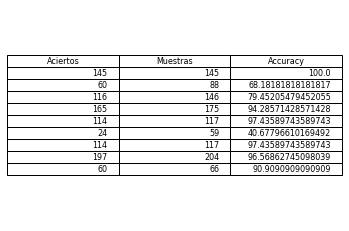

84.99411851062378

In [ ]:
import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,1)

column_labels=["Aciertos", "Muestras", "Accuracy"]
ax.axis('tight')
ax.axis('off')
ax.table(cellText=table,colLabels=column_labels,loc="center")

plt.show()
acc = 0
for fila in table:
  acc += fila[2]
acc/len(table)

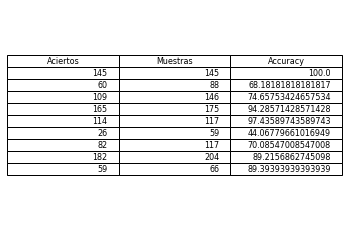

80.81376183489934

In [ ]:
import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,1)

column_labels=["Aciertos", "Muestras", "Accuracy"]
ax.axis('tight')
ax.axis('off')
ax.table(cellText=table,colLabels=column_labels,loc="center")

plt.show()
acc = 0
for fila in table:
  acc += fila[2]
acc/len(table)

In [ ]:
import numpy as np
import cv2

%cd /content/gdrive/My Drive/mask_test_videos
cap = cv2.VideoCapture("result_1304.avi")
fps = (cap.get(cv2.CAP_PROP_FPS))

total = (cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(fps, total)

/content/gdrive/My Drive/mask_test_videos
29.0 2414.0


In [ ]:
resultados

In [ ]:
for (first, last) in secs:
  num = last-first+1
  cnt = 0
  print(num)

2414-2349+1

146
88
146
175
117
59
117
204
7652


66

In [ ]:
v len(resultados)
sum(iter)

1118